Comienzo TP 3

-Predicción de reicidencia a partir de un dataset de presos de la República Argentina.

Impostamos las librerias utilizadas

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import RocCurveDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import RobustScaler

In [2]:
data = pd.DataFrame(pd.read_csv('.\sneep-2021.csv',sep=','))

data.head(5)


,censo_anio,provincia_sneep_id,provincia_descripcion,establecimiento_id,establecimiento_descripcion,edad,genero_id,genero_descripcion,nacionalidad_id,nacionalidad_descripcion,...,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_prision_discontinua_descripcion,participa_programa_semi_detencion_id,participa_programa_semi_detencion_descripcion,tuvo_reduccion_pena_id,tuvo_reduccion_pena_descripcion,mujer_tiene_hijos_intramuro,provincia_id,ultima_provincia_residencia_id
0,2021,5,Chaco,196,COMPLEJO PENITENCIARIO I RESISTENCIA,36,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,22,22.0
1,2021,5,Chaco,196,COMPLEJO PENITENCIARIO I RESISTENCIA,42,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,22,22.0
2,2021,5,Chaco,196,COMPLEJO PENITENCIARIO I RESISTENCIA,26,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,22,22.0
3,2021,5,Chaco,196,COMPLEJO PENITENCIARIO I RESISTENCIA,24,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,22,22.0
4,2021,5,Chaco,196,COMPLEJO PENITENCIARIO I RESISTENCIA,29,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,22,22.0


In [3]:
data.shape

(101267, 86)

Nos quedamos con solo los presos condenados.

In [4]:
data["situacion_legal_descripcion"].unique()

array(['Condenado/a', 'Procesado/a', 'Inimputable', 'Otra situación'],
      dtype=object)

In [5]:
condenados = data["situacion_legal_descripcion"]=='Condenado/a'

data_condenados = data[condenados]

In [6]:
data_condenados.shape

(55933, 86)

Eliminamos las columnas que no utilizaremos

In [7]:
col_drop = [
'censo_anio'
,'provincia_sneep_id'
,'provincia_descripcion'
,'establecimiento_id'
,'establecimiento_descripcion'
,'genero_id'
,'nacionalidad_id'
,'nacionalidad_descripcion'
,'estado_civil_id'
,'nivel_instruccion_id'
,'ultima_situacion_laboral_id'
,'capacitacion_laboral_al_ingresar_id'
,'ultimo_lugar_residencia_id'
,'ultimo_lugar_residencia_descripcion'
,'ultima_provincia_residencia_sneep_id'
,'ultima_provincia_residencia_descripcion'
,'jurisdiccion_id'
,'jurisdiccion_descripcion'
,'situacion_legal_id'
,'situacion_legal_descripcion'
,'fecha_detencion'
,'fecha_condenado'
,'establecimiento_procedencia_id'
,'establecimiento_procedencia_descripcion'
,'delito1_id'
,'delito1_descripcion'
,'delito2_id'
,'delito2_descripcion'
,'delito3_id'
,'delito3_descripcion'
,'delito4_id'
,'delito4_descripcion'
,'delito5_id'
,'delito5_descripcion'
,'horas_trabajo_remunerado_id'
,'horas_trabajo_remunerado_descripcion'
,'participacion_programa_educativo_id'
,'participacion_actividades_deportivas'
,'recibio_atencion_medica_ult_anio'
,'recibio_atencion_medica_ult_anio_descripcion'
,'recibio_visitas_ultimo_anio'
,'participo_alteracion_orden_ult_anio_id'
,'tipo_infraccion_disciplinaria_id'
,'tipo_infraccion_disciplinaria_descripcion'
,'sancion_aplicada_id'
,'sancion_aplicada_descripcion'
,'calificacion_conducta_id'
,'tentativa_fugas_evasiones_id'
,'tentativa_suicidio'
,'fue_lesionado_id'
,'fue_lesionado_descripcion'
,'tipo_condena'
,'es_reincidente_id'
,'tiene_periodo_progresividad_id'
,'tiene_periodo_progresividad_descripcion'
,'reparticion_id'
,'reparticion_descripcion'
,'tuvo_salidas_transitorias_id'
,'incorporado_reg_semi_libertad_id'
,'participa_programa_prision_discontinua_id'
,'participa_programa_semi_detencion_id'
,'tuvo_reduccion_pena_id'
,'mujer_tiene_hijos_intramuro'
,'provincia_id'
,'ultima_provincia_residencia_id'
]


data_condenados = data_condenados.drop(columns=col_drop)




In [8]:
data_condenados.head(5)

,edad,genero_descripcion,estado_civil_descripcion,nivel_instruccion_descripcion,ultima_situacion_laboral_descripcion,capacitacion_laboral_al_ingresar_descripcion,participacion_programa_laboral,participacion_programa_educativo_descripcion,participo_alteracion_orden_ult_anio_descripcion,calificacion_conducta_descripcion,...,duracion_condena_anios,duracion_condena_meses,duracion_condena_rango,es_reincidente_descripcion,tuvo_salidas_transitorias_descripcion,incorporado_reg_semi_libertad_descripcion,participa_programa_pre_libertad,participa_programa_prision_discontinua_descripcion,participa_programa_semi_detencion_descripcion,tuvo_reduccion_pena_descripcion
0,36,Varón,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Buena,...,0,0,0,Primario/a,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,0.0,No está incorporado/a,No tiene semidetención,No tuvo reducción de pena
1,42,Varón,Soltero/a,Secundario completo,Trabajador/ra de tiempo parcial,Tiene algún oficio,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,...,4,0,2,Primario/a,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,0.0,No está incorporado/a,No tiene semidetención,No tuvo reducción de pena
2,26,Varón,Soltero/a,Secundario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,...,4,0,2,Primario/a,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,0.0,No está incorporado/a,No tiene semidetención,No tuvo reducción de pena
3,24,Varón,Soltero/a,Secundario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,...,4,0,2,Primario/a,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,0.0,No está incorporado/a,No tiene semidetención,No tuvo reducción de pena
4,29,Varón,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,...,11,0,4,Primario/a,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,0.0,No está incorporado/a,No tiene semidetención,No tuvo reducción de pena


In [9]:
data_condenados.isnull().sum()

edad                                                     0
genero_descripcion                                       0
estado_civil_descripcion                              1342
nivel_instruccion_descripcion                          863
ultima_situacion_laboral_descripcion                  1195
capacitacion_laboral_al_ingresar_descripcion           303
participacion_programa_laboral                        1661
participacion_programa_educativo_descripcion          1605
participo_alteracion_orden_ult_anio_descripcion         83
calificacion_conducta_descripcion                      649
tentativa_fugas_evasiones_descripcion                  123
duracion_condena_anios                                   0
duracion_condena_meses                                   0
duracion_condena_rango                                   0
es_reincidente_descripcion                            2217
tuvo_salidas_transitorias_descripcion                  948
incorporado_reg_semi_libertad_descripcion              4

In [10]:
data_condenados.dropna(inplace=True)

In [11]:
data_condenados.shape

(49043, 21)

In [13]:
data_condenados.columns

Index(['edad', 'genero_descripcion', 'estado_civil_descripcion',
       'nivel_instruccion_descripcion', 'ultima_situacion_laboral_descripcion',
       'capacitacion_laboral_al_ingresar_descripcion',
       'participacion_programa_laboral',
       'participacion_programa_educativo_descripcion',
       'participo_alteracion_orden_ult_anio_descripcion',
       'calificacion_conducta_descripcion',
       'tentativa_fugas_evasiones_descripcion', 'duracion_condena_anios',
       'duracion_condena_meses', 'duracion_condena_rango',
       'es_reincidente_descripcion', 'tuvo_salidas_transitorias_descripcion',
       'incorporado_reg_semi_libertad_descripcion',
       'participa_programa_pre_libertad',
       'participa_programa_prision_discontinua_descripcion',
       'participa_programa_semi_detencion_descripcion',
       'tuvo_reduccion_pena_descripcion'],
      dtype='object')

<AxesSubplot:xlabel='es_reincidente_descripcion', ylabel='Count'>

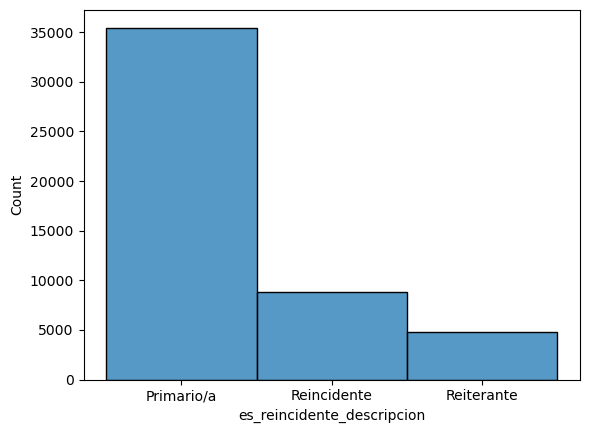

In [30]:
sns.histplot(data=data_condenados["es_reincidente_descripcion"],discrete = True)

#Hay una diferenciación entre persona reiterante y persona reincidente. Se considera reiterante a alguien que es condenado por un delito idéntico o análogo a aquel por el cual fue condenado anteriormente. Reincidente es una persona que comete un delito distinto al último por el que fue detenido


0.2857142857142857

In [12]:
data['tempo']=data.tempo.astype(float)

AttributeError: 'DataFrame' object has no attribute 'tempo'

In [ ]:
data.music_genre.unique()

array(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap',
       'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

In [ ]:
data.obtained_date.unique()

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr'], dtype=object)

La fecha no ofrece ningun dato

In [ ]:
data.drop(columns=['obtained_date'],inplace=True)

In [ ]:
data.drop(columns=['instance_id','artist_name','track_name'],inplace=True)

In [ ]:
categorical_columns=[col for col in data.columns if data[col].dtype == 'object']
numerical_columns=[col for col in data.columns if data[col].dtype  != 'object']

In [ ]:
categorical_columns

['key', 'mode', 'music_genre']

In [ ]:
numerical_columns

['popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

Preparamos nuestro X e y

In [ ]:
X = data.drop(['music_genre'], axis=1)
y = data['music_genre']

Train, test, split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 1237)

Feature engineering

In [ ]:
X_categorical_columns=[col for col in categorical_columns if col != 'music_genre']

In [ ]:
encoder_categories = []

for col in X_categorical_columns:    
    col_categories = data[col].unique()
    encoder_categories.append(col_categories)

encoder_categories

[array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#'],
       dtype=object),
 array(['Minor', 'Major'], dtype=object)]

In [ ]:
encoder = OneHotEncoder(categories = encoder_categories, sparse=False)

encoder = encoder.fit(X_train[X_categorical_columns])
    
X_train_encoded = encoder.transform(X_train[X_categorical_columns])
X_train_categorical = pd.DataFrame(X_train_encoded, columns = encoder.get_feature_names(X_categorical_columns))

X_test_encoded = encoder.transform(X_test[X_categorical_columns])
X_test_categorical = pd.DataFrame(X_test_encoded, columns = encoder.get_feature_names(X_categorical_columns))
X_test_categorical.head()

c:\Users\nicol\anaconda3\envs\dh_sandbox\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\nicol\anaconda3\envs\dh_sandbox\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,key_A#,key_D,key_G#,key_C#,key_F#,key_B,key_G,key_F,key_A,key_C,key_E,key_D#,mode_Minor,mode_Major
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_train_numerical = pd.DataFrame(X_train_scaled, columns = numerical_columns)
#X_train_numerical.head()

X_test_scaled = scaler.transform(X_test[numerical_columns])
X_test_numerical = pd.DataFrame(X_test_scaled, columns = numerical_columns)
X_test_numerical.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,-0.045455,0.955994,0.579592,-0.561110,-0.545692,-0.000930,-0.191216,-0.233534,-0.3792,-0.438273,0.662404
1,-0.772727,1.521244,-0.559184,0.737978,-1.498433,5.735822,-0.074324,-1.739023,0.0288,-0.282569,-0.511509
2,0.681818,-0.265156,-1.428571,1.032782,0.900783,0.101612,1.675676,0.762925,1.7776,1.059351,-0.767263
3,0.818182,0.007587,0.351020,-0.450274,0.553525,-0.000996,-0.006757,0.470255,-0.2784,0.155550,1.258312
4,-0.500000,0.144158,-0.546939,0.898136,-0.203655,0.040888,0.250000,-0.051700,-0.2880,0.635422,-0.181586


In [ ]:
Y_train_concat = Y_train.reset_index(drop=True)
Y_test_concat = Y_test.reset_index(drop=True)

data_train = pd.concat([X_train_categorical, X_train_numerical, Y_train_concat], axis=1)

data_test = pd.concat([X_test_categorical, X_test_numerical, Y_test_concat], axis=1)

In [ ]:
data_train.columns

Index(['key_A#', 'key_D', 'key_G#', 'key_C#', 'key_F#', 'key_B', 'key_G',
       'key_F', 'key_A', 'key_C', 'key_E', 'key_D#', 'mode_Minor',
       'mode_Major', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'music_genre'],
      dtype='object')

In [ ]:
X_train_2=data_train.drop(columns='music_genre')
y_train_2=data_train['music_genre']
X_test_2=data_test.drop(columns='music_genre')
y_test_2=data_test['music_genre']

In [ ]:
X_train_2.shape

(33765, 25)

In [ ]:
y_train_2.shape

(33765,)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_2, y_train_2)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test_2)

y_pred

array(['Country', 'Classical', 'Alternative', ..., 'Classical', 'Hip-Hop',
       'Rock'], dtype='<U11')

Performance

In [ ]:
# accuracy
accuracy_score(y_test_2, y_pred)

0.4103953798311861

In [ ]:
conf_mat = confusion_matrix(y_test_2, y_pred)

In [ ]:
conf_mat

array([[194,   2,  44,  12, 420,  46, 192,  68,  50, 131],
       [ 30, 309, 119, 224, 252, 141,   3,  39,   3,   2],
       [ 38,  58, 327,  47, 365,  98,  12, 117,   4,  30],
       [ 15,  25,  28, 966,  26,  20,   0,  33,   1,   4],
       [ 42,   7,  59,  14, 789,  10,  90,  35,  24,  70],
       [ 72,  59, 105,  24, 113, 467,  98, 134,  11,  20],
       [ 45,   0,   4,   0,  97,  14, 627,  28, 265,  62],
       [ 33,  37, 148, 187, 132, 161,  60, 341,   2,  18],
       [ 26,   0,   3,   1, 121,   5, 601,  20, 249, 111],
       [ 69,   1,  15,  26, 356,  19, 113,  48, 122, 350]], dtype=int64)